<a href="https://colab.research.google.com/github/mimizonee/MachineLearning/blob/main/DGANeuralNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
tf.__version__

'2.5.0'

Dataset for PD

In [ ]:
dataset = pd.read_csv('Mydatasetcsv.csv')
x = dataset.iloc[:, [1,2,3,4,5,6,8,9]].values
y = dataset.iloc[:, -1].values

Dataset for Entire Classification process

In [ ]:
dataset = pd.read_csv('MydatasetPDremoved.csv')
x = dataset.iloc[:, [1,2,3,4,5,6,8,9]].values
y = dataset.iloc[:, -4:].values

In [ ]:
print(x[5])

[2.24000000e+03 9.00000000e+01 1.57000000e+02 1.57000000e+02
 4.50000000e+01 1.24936393e+00 1.00973964e+01 4.16511714e+00]


In [ ]:
print(y[0])

[0 0 0 1]


Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
print(x[0])

[-0.29037902 -0.11848897 -0.20586146 -0.19975701 -0.17079958 -0.78392176
 -0.07785073 -1.24396786]


Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Neural Net Model for PD data classification

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=128, input_dim = 8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Neural Net Model for multiclass classification

In [ ]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=128, input_dim = 8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=128, activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=4, activation='softmax'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Training

In [ ]:
history = ann.fit(x_train, y_train, validation_split=0.2,batch_size = 16, epochs = 100, verbose=2)

Epoch 1/100
20/20 - 1s - loss: 0.5190 - accuracy: 0.8313 - val_loss: 0.3424 - val_accuracy: 0.9250
Epoch 2/100
20/20 - 0s - loss: 0.3302 - accuracy: 0.8906 - val_loss: 0.2617 - val_accuracy: 0.9500
Epoch 3/100
20/20 - 0s - loss: 0.2991 - accuracy: 0.8969 - val_loss: 0.2288 - val_accuracy: 0.9500
Epoch 4/100
20/20 - 0s - loss: 0.2842 - accuracy: 0.9031 - val_loss: 0.3104 - val_accuracy: 0.8750
Epoch 5/100
20/20 - 0s - loss: 0.2753 - accuracy: 0.9031 - val_loss: 0.2192 - val_accuracy: 0.9250
Epoch 6/100
20/20 - 0s - loss: 0.2565 - accuracy: 0.9187 - val_loss: 0.2645 - val_accuracy: 0.9125
Epoch 7/100
20/20 - 0s - loss: 0.2569 - accuracy: 0.9156 - val_loss: 0.2343 - val_accuracy: 0.9125
Epoch 8/100
20/20 - 0s - loss: 0.2493 - accuracy: 0.9125 - val_loss: 0.2302 - val_accuracy: 0.9250
Epoch 9/100
20/20 - 0s - loss: 0.2437 - accuracy: 0.9156 - val_loss: 0.2095 - val_accuracy: 0.9375
Epoch 10/100
20/20 - 0s - loss: 0.2425 - accuracy: 0.9156 - val_loss: 0.2620 - val_accuracy: 0.9125
Epoch 11/

In [ ]:
ann.fit(x_train, y_train, batch_size = 16, epochs = 100, verbose=2)

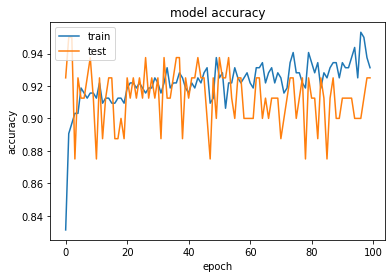

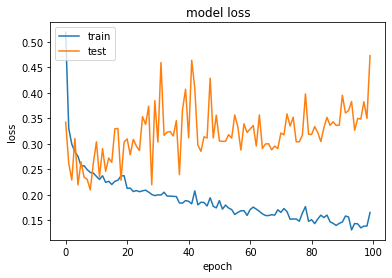

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Testing

In [ ]:
y_pred = ann.predict(x_test)
y_predb = (y_pred > 0.5)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import math

count_total = 0
count_value = 0

mc = MinMaxScaler()
for i in range(len(y_pred)):
  y_predt = [y_pred[i]]
  y_predt = np.transpose(y_predt)
  y_predt = mc.fit_transform(y_predt)
  y_predt = np.transpose(y_predt)
  
  armax=0.0
  arv = 0.0
  index1 = 0
  index2 = 0
  highest_membership = 0.95
  lowest_membership = 0.0

  for j in range(4):
    if(armax<y_pred[i][j]):
      armax = y_pred[i][j]
    if(y_test[i][j]==1):
      index1 = j
    if(y_predt[0][j] > arv):
      index2 = j
      arv = y_predt[0][j]
  
  if(armax <= highest_membership and armax >= lowest_membership):
    count_total += 1
  if(armax<= highest_membership and armax >= lowest_membership and index1!=index2):
    count_value += 1
    print(y_test[i])
    print(y_pred[i])
    print(y_predt)
    print(index1+1, " ", index2+1, '\n')
    #print(np.sum(y_pred[i]), np.sum(y_predt))

print(count_total, count_value)
print(1-count_value/count_total)

[1 0 0 0]
[3.4422818e-01 6.5375382e-01 1.9502449e-03 6.7803587e-05]
[[0.5264919  1.         0.00287973 0.        ]]
1   2 

[0 0 0 1]
[0.00381871 0.09483853 0.88977695 0.01156584]
[[0.         0.10273601 1.         0.00874435]]
4   3 

[0 0 1 0]
[1.9309276e-03 9.3646580e-01 6.1513811e-02 8.9433204e-05]
[[0.00196662 1.         0.06559796 0.        ]]
3   2 

[0 0 0 1]
[9.098683e-01 5.956327e-05 8.426698e-02 5.805136e-03]
[[1.         0.         0.09255508 0.00631514]]
4   1 

[1 0 0 0]
[4.8052199e-02 3.9277709e-01 5.5906856e-01 1.0215848e-04]
[[0.0857834  0.70250183 1.         0.        ]]
1   3 

[0 1 0 0]
[2.3502879e-02 2.3602414e-01 7.4032015e-01 1.5286091e-04]
[[0.03154695 0.31867293 1.0000001  0.        ]]
2   3 

[0 0 1 0]
[6.3139725e-01 4.5418801e-05 2.3791356e-01 1.3064374e-01]
[[1.0000001  0.         0.37676007 0.20685506]]
3   1 

28 7
0.75


Confusion Matrix for PD classification

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predb)
test_accuracy = cm[0,0] + cm[1,1]/np.sum(cm)
print(cm)
print(test_accuracy)

[[83  3]
 [13  2]]
83.01980198019803


Confusion Matrix for Multiclass classification

In [ ]:
from sklearn.metrics import confusion_matrix
y_test_transpose = np.transpose(y_test)
y_pred_transpose = np.transpose(y_predb)
correct_predictions = 0
total = 0
for i in range(4):
  cm = confusion_matrix(y_test_transpose[i], y_pred_transpose[i])
  print(cm)
  correct_predictions += cm[0][0] + cm[1][1]
  total += np.sum(cm)

test_accuracy = correct_predictions/total
print(test_accuracy)


[[69  5]
 [ 3 10]]
[[59  3]
 [ 3 22]]
[[49  5]
 [ 3 30]]
[[70  1]
 [ 6 10]]
0.9166666666666666


In [ ]:
fname = "Weights_DGANN.hdf5"
ann.save_weights(fname, overwrite=True)

In [ ]:
fname = "Weights_DGANN.hdf5"
ann.load_weights(fname)

Generating Coordinate points

In [ ]:
print(x_test[1])

[ 0.04985667 -0.06357461  0.11803286  0.12997761 -0.16381506 -0.22141744
 -0.07818905 -0.94130615]
